In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## Data Cleaning

In [23]:
# Load the dataset
df = pd.read_csv("mastodon_instance_info.csv")

# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   api_versions    304 non-null    object 
 1   blacklist       143 non-null    object 
 2   configuration   344 non-null    object 
 3   contact         344 non-null    object 
 4   description     340 non-null    object 
 5   domain          344 non-null    object 
 6   icon            304 non-null    object 
 7   languages       344 non-null    object 
 8   max_bio_chars   1 non-null      float64
 9   max_post_chars  4 non-null      float64
 10  max_toot_chars  16 non-null     float64
 11  registrations   344 non-null    object 
 12  rules           344 non-null    object 
 13  server          344 non-null    object 
 14  source_url      344 non-null    object 
 15  thumbnail       344 non-null    object 
 16  title           344 non-null    object 
 17  usage           344 non-null    obj

In [24]:
# Check for missing values
print(df.isnull().sum())

api_versions       40
blacklist         201
configuration       0
contact             0
description         4
domain              0
icon               40
languages           0
max_bio_chars     343
max_post_chars    340
max_toot_chars    328
registrations       0
rules               0
server              0
source_url          0
thumbnail           0
title               0
usage               0
version             0
dtype: int64


In [25]:
# Drop unwanted columns
df.drop(columns=['max_bio_chars', 'max_post_chars', 'max_toot_chars'], inplace=True, errors='ignore')

In [26]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   api_versions   304 non-null    object
 1   blacklist      143 non-null    object
 2   configuration  344 non-null    object
 3   contact        344 non-null    object
 4   description    340 non-null    object
 5   domain         344 non-null    object
 6   icon           304 non-null    object
 7   languages      344 non-null    object
 8   registrations  344 non-null    object
 9   rules          344 non-null    object
 10  server         344 non-null    object
 11  source_url     344 non-null    object
 12  thumbnail      344 non-null    object
 13  title          344 non-null    object
 14  usage          344 non-null    object
 15  version        344 non-null    object
dtypes: object(16)
memory usage: 43.1+ KB
None


In [27]:
# Fill missing values for categorical columns
df.fillna("", inplace=True)

In [28]:
# Check for missing values
print(df.isnull().sum())

api_versions     0
blacklist        0
configuration    0
contact          0
description      0
domain           0
icon             0
languages        0
registrations    0
rules            0
server           0
source_url       0
thumbnail        0
title            0
usage            0
version          0
dtype: int64


In [29]:
# Convert blacklist to count
if 'blacklist' in df.columns:
    df['blacklist_count'] = df['blacklist'].apply(lambda x: len(str(x).split("|")) if x else 0)


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   api_versions     344 non-null    object
 1   blacklist        344 non-null    object
 2   configuration    344 non-null    object
 3   contact          344 non-null    object
 4   description      344 non-null    object
 5   domain           344 non-null    object
 6   icon             344 non-null    object
 7   languages        344 non-null    object
 8   registrations    344 non-null    object
 9   rules            344 non-null    object
 10  server           344 non-null    object
 11  source_url       344 non-null    object
 12  thumbnail        344 non-null    object
 13  title            344 non-null    object
 14  usage            344 non-null    object
 15  version          344 non-null    object
 16  blacklist_count  344 non-null    int64 
dtypes: int64(1), object(16)
memory usag

In [31]:
# I want to check the distribution if blacklist_count
df['blacklist_count'].value_counts()

blacklist_count
0      201
41       3
36       3
39       2
107      2
      ... 
29       1
281      1
167      1
42       1
257      1
Name: count, Length: 123, dtype: int64

In [35]:
# Save processed dataset
df.to_csv("processed_dataset.csv", index=False)

## Visulization

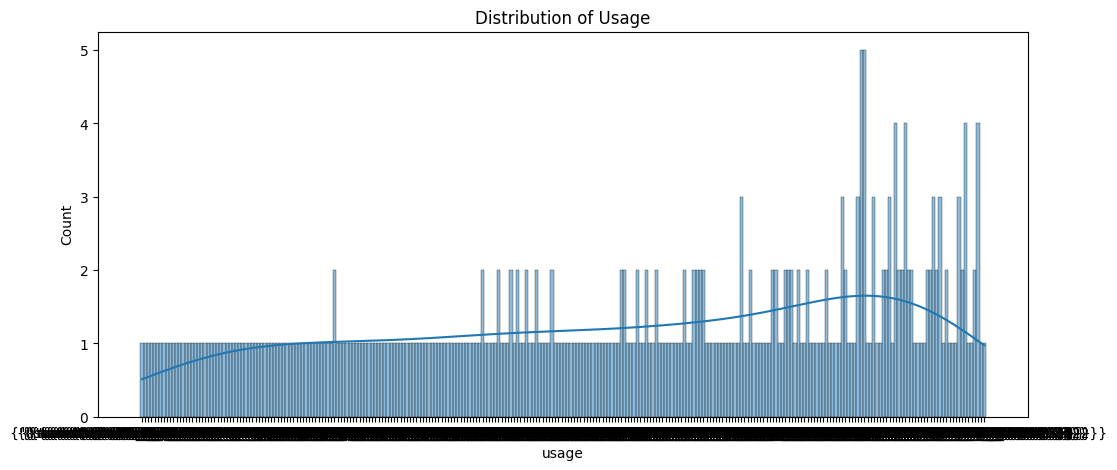

In [ ]:
# Plot distributions
plt.figure(figsize=(12,5))
sns.histplot(df['usage'], bins=50, kde=True)
plt.title("Distribution of Usage")
plt.show()


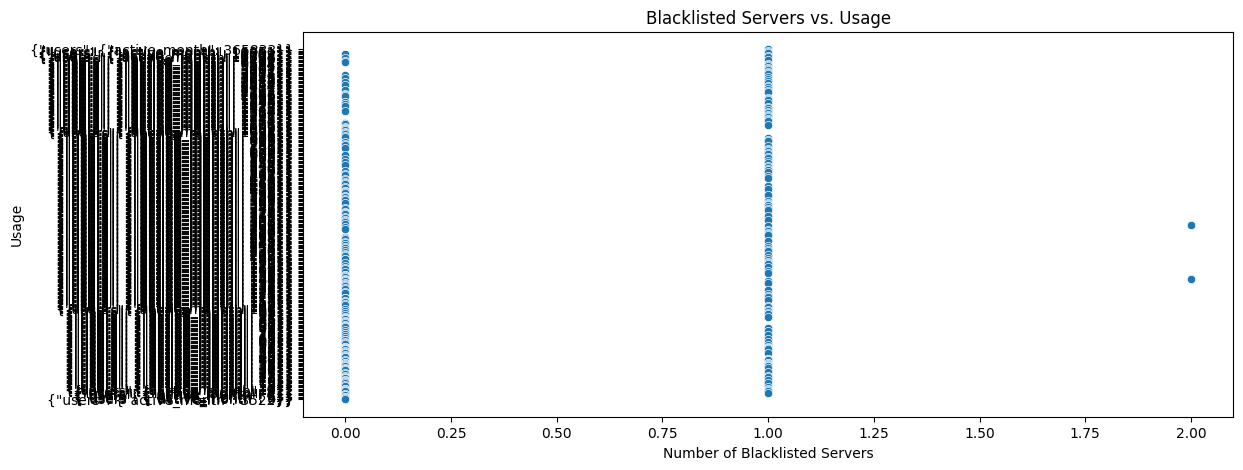

In [18]:
# Relationship between Blacklist and Usage
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['blacklist_count'], y=df['usage'])
plt.xlabel("Number of Blacklisted Servers")
plt.ylabel("Usage")
plt.title("Blacklisted Servers vs. Usage")
plt.show()

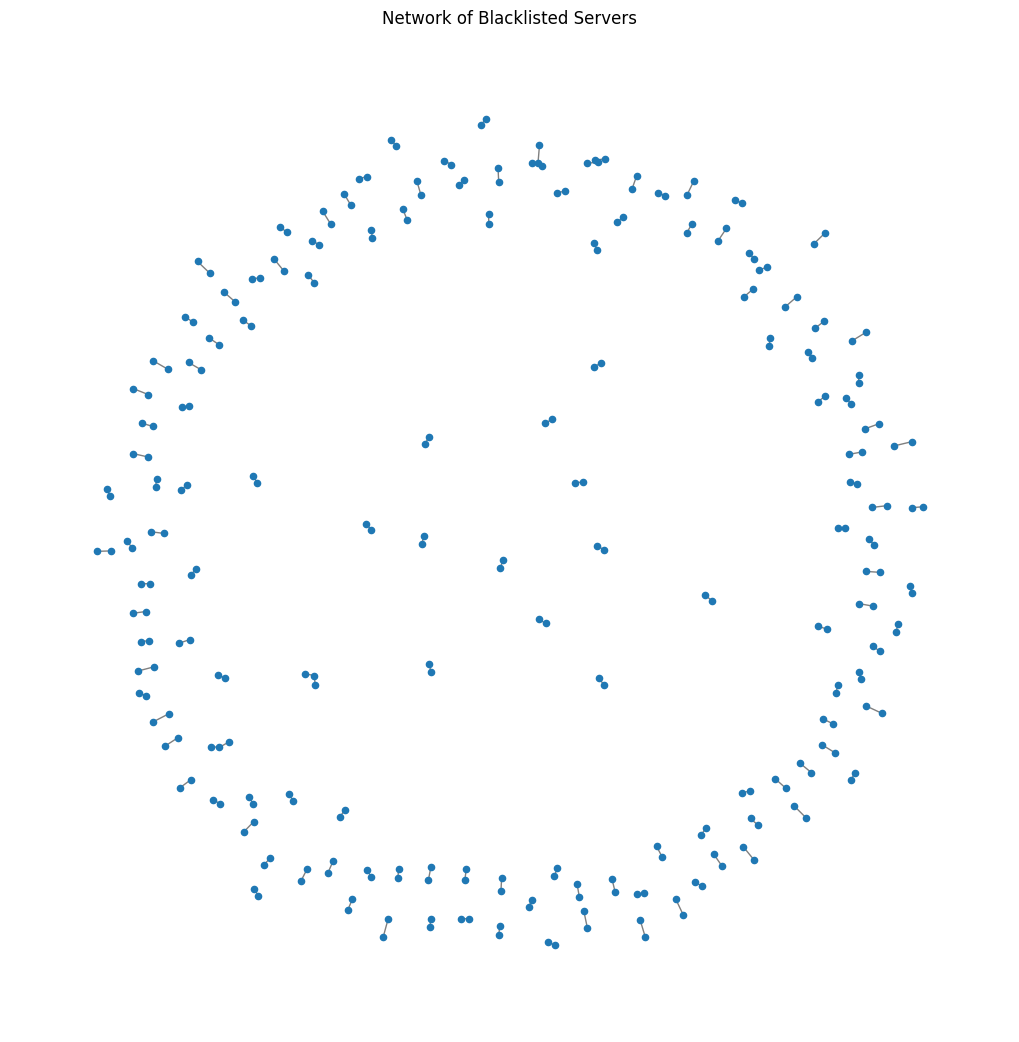

In [34]:
# Network Graph of Server Blacklist
G = nx.Graph()
for _, row in df.iterrows():
    server = row['server']
    blacklisted = str(row['blacklist']).split(',')
    for b in blacklisted:
        if b.strip():
            G.add_edge(server, b.strip())

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=False, node_size=20, edge_color="gray")
plt.title("Network of Blacklisted Servers")
plt.show()
